# Cleaning

[DSLC stages]: Data cleaning and pre-processing


Start by loading in any libraries that you will use in this document.


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import sys

pd.set_option('display.max_columns', 100)


## Domain problem formulation

Write a summary of the problem.





## Data source overview

Briefly describe where the data being used for this project came from


## Step 1: Review background information {#sec-bg-info}

### Information on data collection

Write a summary of how the data was collected.

### Data dictionary

If there is a data dictionary, give some details here.


### Answering questions about the background information

Answer the recommended background information questions from the Data Cleaning chapter.

- *What does each variable measure?* 

- *How was the data collected?* 

- *What are the observational units?* 

- *Is the data relevant to my project?*




## Step 2: Loading in the data


Load in the data. 


In [2]:
data_orig = pd.read_csv(r"../data/anes_timeseries_2020_csv_20220210.csv")

C:\Users\15184\AppData\Local\Temp\ipykernel_27220\560442738.py:1: DtypeWarning: Columns (15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,1508,1509) have mixed types. Specify dtype option on import or set low_memory=False.
  data_orig = pd.read_csv(r"../data/anes_timeseries_2020_csv_20220210.csv")


Let's look at the first few rows to make sure it looks like it has been loaded in correctly:

In [3]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Columns: 1771 entries, version to V203527
dtypes: float64(3), int64(1723), object(45)
memory usage: 111.9+ MB


In [207]:
# Import the function
import importlib
from functions import load_dictionaries_2020
# Reload the module to reflect any updates
importlib.reload(load_dictionaries_2020)

dictionary = load_dictionaries_2020.dictionary()
column_labels = load_dictionaries_2020.column_labels()

In [208]:
import sys
import os
import importlib

path = r"../data/anes_timeseries_2020_csv_20220210.csv"
# Add the directory containing the file to the Python path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(path), 'functions')))

# Import the function
from functions import load_data

# Reload the module to reflect any updates
importlib.reload(load_data)

data_filtered = load_data.load_data(path, dictionary)

C:\Users\15184\OneDrive\Documents\Statistical Principals for Data Science\electionAnalysis\dslc_documentation\functions\load_data.py:7: DtypeWarning: Columns (15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,1508,1509) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)  # Modify this if your data is in a different format (e.g., .xlsx, .json, etc.)


In [209]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Data columns (total 65 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   interviewMode                         8280 non-null   int64 
 1   weights                               8280 non-null   object
 2   PRE_VotePresident                     8280 non-null   int64 
 3   PRE_approvalOfPresidentCovidResponse  8280 non-null   int64 
 4   PRE_RaceOutcomePrediction             8280 non-null   int64 
 5   PRE_ThermoBiden                       8280 non-null   int64 
 6   PRE_ThermoTrump                       8280 non-null   int64 
 7   PRE_ThermoHarris                      8280 non-null   int64 
 8   PRE_ThermoPence                       8280 non-null   int64 
 9   PRE_ThermoObama                       8280 non-null   int64 
 10  PRE_ThermoDemParty                    8280 non-null   int64 
 11  PRE_ThermoRepParty            



## Step 3: Examine the data

In this section we explore the common messy data traits to identify any cleaning action items.





### Finding invalid values



In [210]:
data_filtered.describe()

,interviewMode,PRE_VotePresident,PRE_approvalOfPresidentCovidResponse,PRE_RaceOutcomePrediction,PRE_ThermoBiden,PRE_ThermoTrump,PRE_ThermoHarris,PRE_ThermoPence,PRE_ThermoObama,PRE_ThermoDemParty,PRE_ThermoRepParty,PRE_ParentNativeStatus,PRE_YearsAtAddress,Sex,PRE_SummaryVoteDutyChoice,PRE_PartyID,PRE_ScaleGovAssistance,PRE_religionImportance,PRE_CountryDirection,PRE_GovTrust,PRE_EconomyView,PRE_AbortionRightsSC,Age,EducationLevel,WorkStatus,Income,Race,StateRegistration,HouseholdChildren,PRE_Fox_Hannity,PRE_Fox_TuckerCarlsonTonight,PRE_Fox_SpecialReportBretBaier,PRE_Fox_TheFive,PRE_Fox_TheIngrahamAngle,PRE_Fox_TheStoryMarthaMacCallum,PRE_Fox_FoxAndFriends,PRE_Fox_FoxNewsWebsite,PRE_CNN_TheLeadJakeTapper,PRE_CNN_AndersonCooper360,PRE_CNN_CuomoPrimeTime,PRE_CNN_ErinBurnettOutFront,PRE_CNN_CNNWebsite,PRE_ABC_WorldNewsTonight,PRE_ABC_2020,PRE_ABC_GoodMorningAmerica,PRE_PartyMoreHouseMembers,PRE_FederalSpendingKnowledge,PRE_VoteAccuracy,PRE_SurveySeriousness,PRE_ScaleDefenseSpending,PRE_ScaleMedInsurance,PRE_CorruptionView,PRE_ScaleJobIncome,POST_RegistrationStatus,POST_Voted2020,POST_VotePresident,POST_VoteAccuracy,POST_ThermoHarris,POST_ThermoPence,POST_ThermoBiden,POST_ThermoTrump,POST_ReasonNotVoting,POST_ProblemMention,POST_RespondentHonesty
count,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000
mean,2.896498,1.165097,2.897705,1.253261,47.812319,39.055314,49.675362,44.637077,59.907488,44.752536,43.131763,1.231643,11.610507,1.456522,3.251449,3.833816,18.079106,2.759179,2.493961,3.420531,3.212802,1.977899,49.038889,5.532126,1.399758,10.221739,1.498913,23.251691,0.533213,-0.253623,-0.250242,-0.267633,-0.259300,-0.268961,-0.275362,-0.229469,-0.306039,-0.268116,-0.238164,-0.256763,-0.278382,-0.257126,-0.212319,-0.236473,-0.224758,1.086957,2.032850,3.004469,4.558092,16.971256,14.064855,1.620169,14.743841,-1.261957,1.011715,0.238889,1.355193,46.183816,40.408454,46.919807,33.297705,-0.520652,80.242271,-1.459058
std,0.423705,1.937772,1.345693,0.992782,36.806871,40.571078,65.887540,55.784589,37.425584,35.949072,36.148125,0.969502,12.098934,1.066932,2.406670,2.397490,33.187170,1.652934,1.304090,1.207423,1.261308,1.233611,20.771267,9.987560,0.823674,8.444621,1.698425,18.594514,1.313558,0.951118,0.953788,0.939846,0.946592,0.938759,0.933479,0.969770,1.008629,0.939451,0.963166,0.948621,0.930962,1.045849,0.982437,0.964460,0.973295,1.468080,2.098351,1.485154,1.447893,32.377374,29.738682,1.348386,30.002713,1.865796,2.426249,2.566320,2.825230,48.731938,47.695825,38.600682,40.314633,3.970426,151.006446,1.684504
min,1.000000,-9.000000,-2.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-2.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-7.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-7.000000
25%,3.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,0.000000,30.000000,15.000000,15.

#### Numeric variables



In [211]:
from functions import prepare_data

importlib.reload(prepare_data)

ranked_columns, num_columns, cat_columns = prepare_data.extract_ranked_num_and_cat_columns(dictionary)

print(ranked_columns)
print(num_columns)

['PRE_approvalOfPresidentCovidResponse', 'PRE_ThermoBiden', 'PRE_ThermoTrump', 'PRE_ThermoHarris', 'PRE_ThermoPence', 'PRE_ThermoObama', 'PRE_ThermoDemParty', 'PRE_ThermoRepParty', 'PRE_SummaryVoteDutyChoice', 'PRE_PartyID', 'PRE_ScaleGovAssistance', 'PRE_religionImportance', 'PRE_CountryDirection', 'PRE_GovTrust', 'PRE_EconomyView', 'Income', 'HouseholdChildren', 'PRE_VoteAccuracy', 'PRE_SurveySeriousness', 'PRE_ScaleDefenseSpending', 'PRE_ScaleMedInsurance', 'PRE_ScaleJobIncome', 'POST_VoteAccuracy', 'POST_ThermoHarris', 'POST_ThermoPence', 'POST_ThermoBiden', 'POST_ThermoTrump']
['weights', 'PRE_YearsAtAddress', 'Age']


#### Categorical variables




In [212]:
print(cat_columns)

['interviewMode', 'PRE_VotePresident', 'PRE_RaceOutcomePrediction', 'PRE_ParentNativeStatus', 'Sex', 'PRE_AbortionRightsSC', 'EducationLevel', 'WorkStatus', 'Race', 'StateRegistration', 'PRE_Fox_Hannity', 'PRE_Fox_TuckerCarlsonTonight', 'PRE_Fox_SpecialReportBretBaier', 'PRE_Fox_TheFive', 'PRE_Fox_TheIngrahamAngle', 'PRE_Fox_TheStoryMarthaMacCallum', 'PRE_Fox_FoxAndFriends', 'PRE_Fox_FoxNewsWebsite', 'PRE_CNN_TheLeadJakeTapper', 'PRE_CNN_AndersonCooper360', 'PRE_CNN_CuomoPrimeTime', 'PRE_CNN_ErinBurnettOutFront', 'PRE_CNN_CNNWebsite', 'PRE_ABC_WorldNewsTonight', 'PRE_ABC_2020', 'PRE_ABC_GoodMorningAmerica', 'PRE_PartyMoreHouseMembers', 'PRE_FederalSpendingKnowledge', 'PRE_CorruptionView', 'POST_RegistrationStatus', 'POST_Voted2020', 'POST_VotePresident', 'POST_ReasonNotVoting', 'POST_ProblemMention', 'POST_RespondentHonesty']


### Examining missing values




In [213]:
# Count missing values for each column
missing_values_count = data_filtered.isna().sum()

# Display the counts
print("Missing values count for each column:")
print(missing_values_count)

# Filter out columns with no missing values
missing_values_greater_than_zero = missing_values_count[missing_values_count > 0]

print()
# Display the counts for columns with missing values
print("Missing values count for columns with missing values greater than 0:")
print(missing_values_greater_than_zero)


Missing values count for each column:
interviewMode                           0
weights                                 0
PRE_VotePresident                       0
PRE_approvalOfPresidentCovidResponse    0
PRE_RaceOutcomePrediction               0
                                       ..
POST_ThermoBiden                        0
POST_ThermoTrump                        0
POST_ReasonNotVoting                    0
POST_ProblemMention                     0
POST_RespondentHonesty                  0
Length: 65, dtype: int64

Missing values count for columns with missing values greater than 0:
Series([], dtype: int64)


### Examining the data format



### Assessing column names and variable type



In [214]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Data columns (total 65 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   interviewMode                         8280 non-null   int64 
 1   weights                               8280 non-null   object
 2   PRE_VotePresident                     8280 non-null   int64 
 3   PRE_approvalOfPresidentCovidResponse  8280 non-null   int64 
 4   PRE_RaceOutcomePrediction             8280 non-null   int64 
 5   PRE_ThermoBiden                       8280 non-null   int64 
 6   PRE_ThermoTrump                       8280 non-null   int64 
 7   PRE_ThermoHarris                      8280 non-null   int64 
 8   PRE_ThermoPence                       8280 non-null   int64 
 9   PRE_ThermoObama                       8280 non-null   int64 
 10  PRE_ThermoDemParty                    8280 non-null   int64 
 11  PRE_ThermoRepParty            



## Step 4: Prepare the data

Don't forget to split the data into training, validation and test sets before you clean and pre-process it!

In [215]:
from functions import prepare_data

importlib.reload(prepare_data)

data_processed = prepare_data.clean_columns(data_filtered, dictionary)

In [216]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Data columns (total 65 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   interviewMode                         8280 non-null   int64  
 1   weights                               7453 non-null   float64
 2   PRE_VotePresident                     7049 non-null   float64
 3   PRE_approvalOfPresidentCovidResponse  8238 non-null   float64
 4   PRE_RaceOutcomePrediction             8213 non-null   float64
 5   PRE_ThermoBiden                       8060 non-null   float64
 6   PRE_ThermoTrump                       8048 non-null   float64
 7   PRE_ThermoHarris                      7980 non-null   float64
 8   PRE_ThermoPence                       8045 non-null   float64
 9   PRE_ThermoObama                       8165 non-null   float64
 10  PRE_ThermoDemParty                    8152 non-null   float64
 11  PRE_ThermoRepPart

C:\Users\15184\AppData\Local\Temp\ipykernel_10976\1131574219.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='coolwarm')


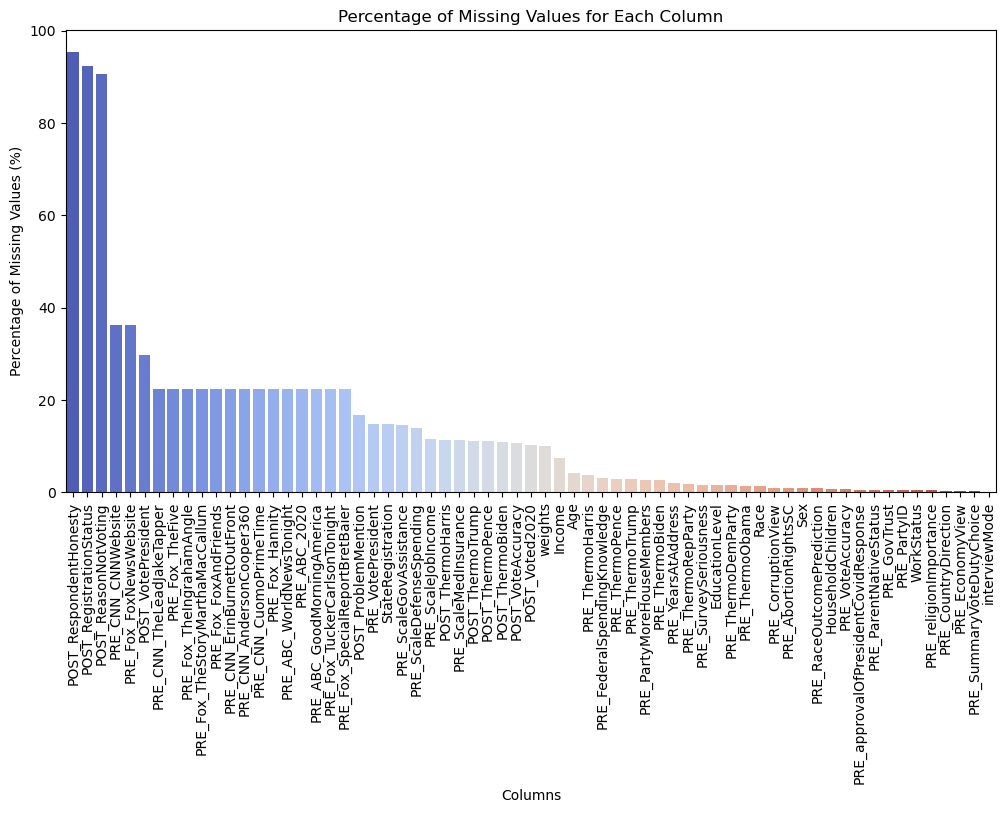

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the percentage of missing values for each column
missing_percentage = data_processed.isnull().mean() * 100

# Sort the percentages in descending order
missing_percentage = missing_percentage.sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='coolwarm')

# Add labels and title
plt.title('Percentage of Missing Values for Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values (%)')
plt.xticks(rotation=90)  # Rotate column names for readability
plt.show()



In [218]:
from functions import prepare_data

importlib.reload(prepare_data)


data_dropped, dropped_columns = prepare_data.drop_high_missing_columns(data_processed)
print("Drpped_columns:")
print(dropped_columns)

dict_ = prepare_data.remove_keys_from_dict(dictionary, dropped_columns)

Drpped_columns:
['POST_ReasonNotVoting', 'POST_RegistrationStatus', 'POST_RespondentHonesty']


In [219]:
importlib.reload(prepare_data)

# Test for optimal k
data_imputed = prepare_data.knn_impute(data_dropped, dict_,column_labels)

In [220]:
data_imputed['POST_ProblemMention'].value_counts()

POST_ProblemMention
82    2156
32     673
81     608
47     417
49     363
      ... 
23       1
1        1
77       1
22       1
76       1
Name: count, Length: 72, dtype: int64

In [221]:
importlib.reload(prepare_data)
data_imputed = prepare_data.group_top_and_other(data_imputed,'POST_ProblemMention')

In [222]:
print(data_imputed['POST_ProblemMention'].value_counts())

POST_ProblemMention
83    2801
82    2156
32     673
81     608
47     417
49     363
50     341
48     314
24     238
78     188
53     181
Name: count, dtype: int64


In [223]:
importlib.reload(prepare_data)
data_imputed = prepare_data.replace_all_other_cols(data_imputed, 'PRE_FederalSpendingKnowledge', 1)

In [224]:
data_imputed['PRE_FederalSpendingKnowledge'].value_counts()

PRE_FederalSpendingKnowledge
1    8280
Name: count, dtype: int64

In [225]:
importlib.reload(prepare_data)
data_combined = prepare_data.combine_columns_by_group(data_imputed)

In [226]:
importlib.reload(prepare_data)
data_combined = prepare_data.add_swing_voter_column_2020(data_combined, column_labels)

In [227]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   interviewMode                         8280 non-null   int32  
 1   weights                               8280 non-null   float64
 2   PRE_VotePresident                     8280 non-null   int32  
 3   PRE_approvalOfPresidentCovidResponse  8280 non-null   int32  
 4   PRE_RaceOutcomePrediction             8280 non-null   int32  
 5   PRE_ThermoBiden                       8280 non-null   int32  
 6   PRE_ThermoTrump                       8280 non-null   int32  
 7   PRE_ThermoHarris                      8280 non-null   int32  
 8   PRE_ThermoPence                       8280 non-null   int32  
 9   PRE_ThermoObama                       8280 non-null   int32  
 10  PRE_ThermoDemParty                    8280 non-null   int32  
 11  PRE_ThermoRepPart

In [228]:
importlib.reload(prepare_data)
data_one_hot = prepare_data.one_hot_cat_cols(data_combined, dict_,column_labels)

In [229]:
data_one_hot

,weights,PRE_approvalOfPresidentCovidResponse,PRE_ThermoBiden,PRE_ThermoTrump,PRE_ThermoHarris,PRE_ThermoPence,PRE_ThermoObama,PRE_ThermoDemParty,PRE_ThermoRepParty,PRE_YearsAtAddress,PRE_SummaryVoteDutyChoice,PRE_PartyID,PRE_ScaleGovAssistance,PRE_religionImportance,PRE_CountryDirection,PRE_GovTrust,PRE_EconomyView,Age,Income,HouseholdChildren,PRE_VoteAccuracy,PRE_SurveySeriousness,PRE_ScaleDefenseSpending,PRE_ScaleMedInsurance,PRE_ScaleJobIncome,POST_VoteAccuracy,POST_ThermoHarris,POST_ThermoPence,POST_ThermoBiden,POST_ThermoTrump,mentionFox,mentionABC,mentionCNN,swing_voter,interviewMode_Telephone,interviewMode_Web,PRE_VotePresident_Donald Trump,PRE_VotePresident_Jo Jorgensen,PRE_VotePresident_Howie Hawkins,PRE_VotePresident_Other,PRE_RaceOutcomePrediction_Win by quite a bit,PRE_ParentNativeStatus_One parent born in the US,PRE_ParentNativeStatus_Both parents born in another country,Sex_Female,PRE_AbortionRightsSC_Upset,PRE_AbortionRightsSC_Neither pleased nor upset,EducationLevel_High school graduate,EducationLevel_Some college but no degree,EducationLevel_Associate degree - occupational/vocational,EducationLevel_Associate degree - academic,...,StateRegistration_Maine,StateRegistration_Maryland,StateRegistration_Massachusetts,StateRegistration_Michigan,StateRegistration_Minnesota,StateRegistration_Mississippi,StateRegistration_Missouri,StateRegistration_Montana,StateRegistration_Nebraska,StateRegistration_Nevada,StateRegistration_New Hampshire,StateRegistration_New Jersey,StateRegistration_New Mexico,StateRegistration_New York,StateRegistration_North Carolina,StateRegistration_North Dakota,StateRegistration_Ohio,StateRegistration_Oklahoma,StateRegistration_Oregon,StateRegistration_Pennsylvania,StateRegistration_Rhode Island,StateRegistration_South Carolina,StateRegistration_South Dakota,StateRegistration_Tennessee,StateRegistration_Texas,StateRegistration_Utah,StateRegistration_Vermont,StateRegistration_Virginia,StateRegistration_Washington,StateRegistration_West Virginia,StateRegistration_Wisconsin,StateRegistration_Wyoming,PRE_PartyMoreHouseMembers_incorrect (R),PRE_CorruptionView_Decreased,PRE_CorruptionView_Stayed the same,POST_Voted2020_Registered and did not vote,POST_Voted2020_Voted,POST_VotePresident_Donald Trump,POST_VotePresident_Jo Jorgensen,POST_VotePresident_Howie Hawkins,POST_ProblemMention_Race relations,POST_ProblemMention_Partisan politics,POST_ProblemMention_Politicians,POST_ProblemMention_Government (all other),POST_ProblemMention_The economy,POST_ProblemMention_Recession,POST_ProblemMention_Elections,POST_ProblemMention_Unity /division,POST_ProblemMention_Health care,POST_ProblemMention_Other
0,1.01,1,0,100,0,85,0,0,85,10.0,1,7,1,2,3,5,2,46.0,21,0,3,5,7,7,7,2,0,85,0,100,0,0,0,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False
1,1.16,3,0,0,0,0,50,0,50,4.0,4,4,3,5,1,5,3,37.0,13,1,2,5,4,4,5,2,0,0,15,15,0,0,0,False,False,True,False,True,False,False,False,False,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False
2,0.77,4,65,0,65,0,90,60,0,11.0,4,3,6,3,1,4,4,40.0,17,2,3,5,1,2,4,1,80,0,85,0,0,0,1,False,False,True,False,False,False,False,True,False,False,True,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Fa

In [230]:
'Sex_Female' in data_one_hot.columns

True

In [231]:
import pandas as pd

# Example DataFrame
# data_one_hot = pd.DataFrame(...)

# Get all columns containing 'StateRegistration'
columns_with_state_registration = data_one_hot.filter(like='StateRegistration', axis=1).columns

print(columns_with_state_registration)


Index(['StateRegistration_Alaska', 'StateRegistration_Arizona',
       'StateRegistration_Arkansas', 'StateRegistration_California',
       'StateRegistration_Colorado', 'StateRegistration_Connecticut',
       'StateRegistration_Delaware', 'StateRegistration_Washington DC',
       'StateRegistration_Florida', 'StateRegistration_Georgia',
       'StateRegistration_Hawaii', 'StateRegistration_Idaho',
       'StateRegistration_Illinois', 'StateRegistration_Indiana',
       'StateRegistration_Iowa', 'StateRegistration_Kansas',
       'StateRegistration_Kentucky', 'StateRegistration_Louisiana',
       'StateRegistration_Maine', 'StateRegistration_Maryland',
       'StateRegistration_Massachusetts', 'StateRegistration_Michigan',
       'StateRegistration_Minnesota', 'StateRegistration_Mississippi',
       'StateRegistration_Missouri', 'StateRegistration_Montana',
       'StateRegistration_Nebraska', 'StateRegistration_Nevada',
       'StateRegistration_New Hampshire', 'StateRegistration_New 

In [232]:
train_data, val_data, test_data = prepare_data.split_data(data_one_hot)

In [233]:
# Save the datasets to CSV files
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Convert dictionary to DataFrame
df = pd.DataFrame.from_dict(dictionary, orient='index')
# Save to CSV
df.to_csv('dictionary.csv', index=True)

# Time Series Data

In [97]:
# Import the function
import importlib
from functions import load_dictionaries_time_series
# Reload the module to reflect any updates
importlib.reload(load_dictionaries_time_series)

dict_time_series = load_dictionaries_time_series.dict_time_series()
column_labels_time = load_dictionaries_time_series.column_labels_time()

In [98]:
import sys
import os
import importlib

path = r"../data/anes_timeseries_cdf_csv_20220916.csv"

# Add the directory containing the file to the Python path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(path), 'functions')))

# Import the function
from functions import load_data

# Reload the module to reflect any updates
importlib.reload(load_data)

data_time_filtered = load_data.load_data(path, dict_time_series)

C:\Users\15184\OneDrive\Documents\Statistical Principals for Data Science\electionAnalysis\dslc_documentation\functions\load_data.py:7: DtypeWarning: Columns (4,5,6,7,8,9,13,14,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,38,39,40,41,42,43,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,233,254,275,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,

In [99]:
data_time_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68224 entries, 0 to 68223
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   incCrimeFedSpending    68224 non-null  object
 1   interestInElection     68224 non-null  object
 2   illegalAliens          68224 non-null  object
 3   PRE_IntentVote         68224 non-null  object
 4   Year                   68224 non-null  int64 
 5   Sex                    68224 non-null  int64 
 6   PartyID                68224 non-null  object
 7   ScaleSpendingServices  68224 non-null  object
 8   religiousAttendence    68224 non-null  object
 9   EconomyView            68224 non-null  object
 10  AbortionRightsSC       68224 non-null  object
 11  Age                    68224 non-null  object
 12  EducationLevel         68224 non-null  int64 
 13  Income                 68224 non-null  object
 14  Race                   68224 non-null  object
 15  Region             

In [100]:
from functions import prepare_data

importlib.reload(prepare_data)

data_time_processed = prepare_data.clean_columns(data_time_filtered, dict_time_series)

In [101]:
data_time_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68224 entries, 0 to 68223
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   incCrimeFedSpending    32706 non-null  float64
 1   interestInElection     64833 non-null  float64
 2   illegalAliens          26111 non-null  float64
 3   PRE_IntentVote         45884 non-null  float64
 4   Year                   68224 non-null  int64  
 5   Sex                    68213 non-null  float64
 6   PartyID                67562 non-null  float64
 7   ScaleSpendingServices  35350 non-null  float64
 8   religiousAttendence    52659 non-null  float64
 9   EconomyView            43997 non-null  float64
 10  AbortionRightsSC       41742 non-null  float64
 11  Age                    66415 non-null  float64
 12  EducationLevel         68224 non-null  int64  
 13  Income                 66713 non-null  float64
 14  Race                   66527 non-null  float64
 15  Re

In [102]:
def count_nulls_per_year(df, year_column):
    """
    Count the number of null values for each column grouped by the year.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        year_column (str): The column name representing the year.

    Returns:
        pd.DataFrame: A DataFrame showing the number of null values for each column per year.
    """
    if year_column not in df.columns:
        raise ValueError(f"Year column '{year_column}' not found in DataFrame.")
    
    # Group by year and calculate total null values and total possible values
    percent_nulls = df.groupby(year_column).apply(
        lambda group: group.isnull().sum().sum() / (group.shape[0] * group.shape[1]) * 100
    )
    
    return percent_nulls

nulls_by_year = count_nulls_per_year(data_time_processed, dict_time_series["VCF0004"]["column"])
print(nulls_by_year)

Year
1948    65.553102
1952    43.968485
1954    76.923077
1956    42.322972
1958    50.196286
1960    42.584511
1962    57.745685
1964    38.880184
1966    53.846154
1968    39.353293
1970    43.096320
1972    33.611546
1974    50.358974
1976    32.603340
1978    39.613381
1980    25.016681
1982    29.120104
1984    14.631403
1986    28.199236
1988    15.020739
1990    26.386946
1992     7.361090
1994    13.091922
1996     6.974239
1998    23.737465
2000     6.349240
2002    39.459349
2004     3.043285
2008     2.307361
2012     5.496085
2016     3.689425
2020     3.555834
dtype: float64


C:\Users\15184\AppData\Local\Temp\ipykernel_10976\1504413466.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percent_nulls = df.groupby(year_column).apply(


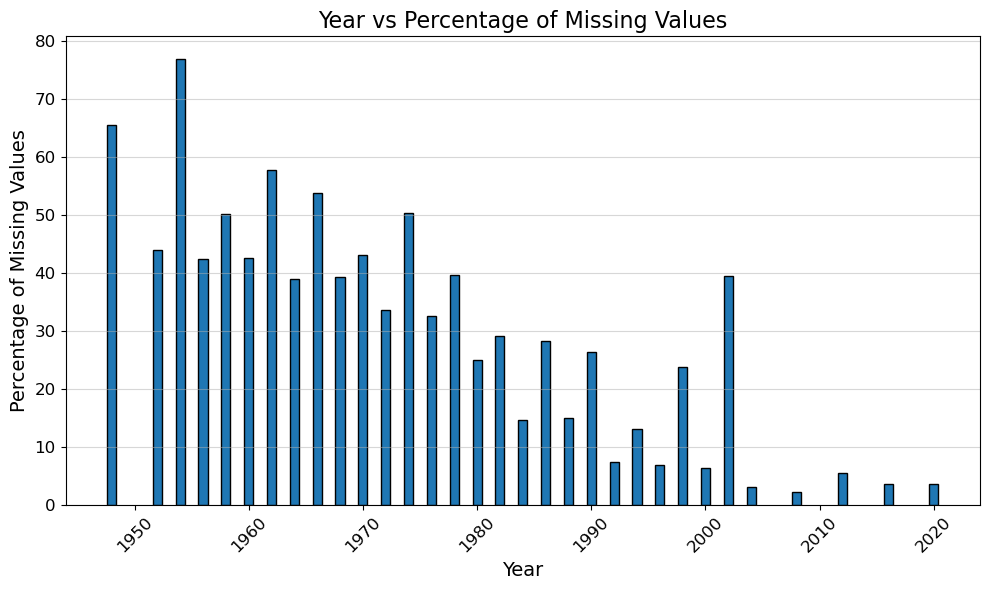

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

# Original data (assuming nulls_by_year is a pandas Series with index as Year and values as the data)
data = {
    'Year': nulls_by_year.index,  # Year values from the index of nulls_by_year
    'Value': nulls_by_year.values  # Values from the nulls_by_year series
}
df = pd.DataFrame(data)

# Plotting bar graph
plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['Value'], edgecolor='black')  # Create a bar graph
plt.title('Year vs Percentage of Missing Values', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Missing Values', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5)  # Optional: Show grid lines for the y-axis

# Save the plot as a figure
plt.tight_layout()
plt.savefig('year_vs_value_bar_graph.png', dpi=300)  # Save as a high-resolution PNG file
plt.show()



In [104]:
from functions import prepare_data

importlib.reload(prepare_data)

year_column = dict_time_series["VCF0004"]["column"] 
cutoff_year = 1972

df_time_filtered = prepare_data.drop_rows_before_year(data_time_processed, year_column, cutoff_year)

In [105]:
data_time_dropped, dropped_time_columns = prepare_data.drop_high_missing_columns(df_time_filtered)
print("Drpped_columns:")
print(dropped_time_columns)

Drpped_columns:
['EasierBuyGun', 'illegalAliens']


In [106]:
from functions import prepare_data

importlib.reload(prepare_data)
dict_time_series = prepare_data.remove_keys_from_dict(dict_time_series, dropped_time_columns)

In [107]:
count_nulls_per_year(data_time_dropped, dict_time_series["VCF0004"]["column"])

C:\Users\15184\AppData\Local\Temp\ipykernel_10976\1504413466.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percent_nulls = df.groupby(year_column).apply(


Year
1972    28.079174
1974    46.222222
1976    26.986951
1978    34.581163
1980    18.768071
1982    23.213446
1984     7.517353
1986    22.215839
1988     7.939134
1990    20.252525
1992     3.276325
1994     9.865367
1996     2.866103
1998    21.431824
2000     2.681701
2002    34.414295
2004     2.695270
2008     1.981051
2012     5.567298
2016     3.340164
2020     2.928744
dtype: float64

In [108]:
importlib.reload(prepare_data)

# Test for optimal k
data_time_imputed = prepare_data.knn_impute(data_time_dropped, dict_time_series, column_labels_time)

In [109]:
importlib.reload(prepare_data)
df_swing = prepare_data.add_swing_voter_column_timeSeries(data_time_imputed, column_labels_time)

In [110]:
df_swing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52908 entries, 0 to 52907
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   incCrimeFedSpending    52908 non-null  int32  
 1   interestInElection     52908 non-null  int32  
 2   PRE_IntentVote         52908 non-null  int32  
 3   Year                   52908 non-null  float64
 4   Sex                    52908 non-null  int32  
 5   PartyID                52908 non-null  int32  
 6   ScaleSpendingServices  52908 non-null  int32  
 7   religiousAttendence    52908 non-null  int32  
 8   EconomyView            52908 non-null  int32  
 9   AbortionRightsSC       52908 non-null  int32  
 10  Age                    52908 non-null  float64
 11  EducationLevel         52908 non-null  int32  
 12  Income                 52908 non-null  int32  
 13  Race                   52908 non-null  int32  
 14  Region                 52908 non-null  int32  
 15  Sc

In [111]:
importlib.reload(prepare_data)
data_time_one_hot = prepare_data.one_hot_cat_cols(df_swing, dict_time_series, column_labels_time)

In [236]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare your features (X) by dropping the target variable
X = data_time_one_hot.drop(columns=['swing_voter'])

# Add a constant (intercept)
X = sm.add_constant(X)

# Convert boolean columns to integers (0 and 1)
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

# Ensure all columns are numeric
if not all([np.issubdtype(dtype, np.number) for dtype in X.dtypes]):
    X = X.apply(pd.to_numeric, errors='coerce')

# Check and handle missing or infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the results
print(vif_data)

                                            Feature           VIF
0                                             const  25827.774691
1                               incCrimeFedSpending      1.068576
2                                interestInElection      1.221610
3                                              Year      1.716134
4                                           PartyID      2.026406
5                             ScaleSpendingServices      1.357721
6                               religiousAttendence      1.338541
7                                       EconomyView      1.039517
8                                               Age      1.557608
9                              ScaleDefenseSpending      1.408504
10                                ScaleMedInsurance      1.352077
11                                    FedWasteTaxes      1.059270
12                                TraditionalValues      1.435375
13                        PRE_IntentVote_Republican      2.211749
14        

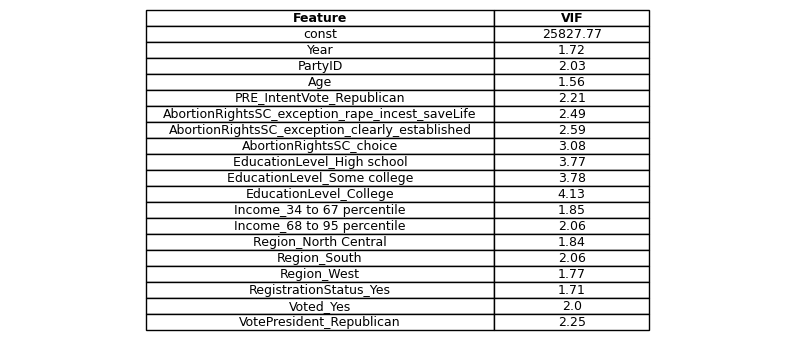

In [240]:
import matplotlib.pyplot as plt

# Filter the VIF data to show only those greater than the threshold
threshold = 1.5
vif_filtered = vif_data[vif_data['VIF'] > threshold]

# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(10, 2))  # Adjust figsize as needed

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Set column widths (adjust to your needs)
col_widths = [0.45, 0.2]  # Wider "Feature", narrower "VIF"

# Create a table plot of the filtered DataFrame
table = ax.table(
    cellText=vif_filtered.round(2).values,
    colLabels=vif_filtered.columns,
    cellLoc='center',
    loc='center',
    colWidths=col_widths
)

# Bold the first row (column headers)
table.auto_set_font_size(False)
table.set_fontsize(9)

for key, cell in table.get_celld().items():
    if key[0] == 0:  # This is the header row
        cell.set_text_props(fontweight='bold')

# Adjust space for the title
plt.subplots_adjust(top=0.85)

# Add a title mentioning the threshold
#plt.suptitle(f"Variables with VIF > {threshold}", fontsize=12, fontweight='bold', y=0.98)

# Save the figure as a PNG file
plt.savefig('VIF_image_filtered_adjusted.png', bbox_inches='tight', dpi=300)

# Show the plot in Jupyter (optional)
plt.show()


In [114]:
train_time_data, val_time_data, test_time_data = prepare_data.split_data(data_time_one_hot)

In [115]:
# Save the datasets to CSV files
train_time_data.to_csv('train_time_data.csv', index=False)
val_time_data.to_csv('val_time_data.csv', index=False)
test_time_data.to_csv('test_time_data.csv', index=False)

# Convert dictionary to DataFrame
df = pd.DataFrame.from_dict(dict_time_series, orient='index')
# Save to CSV
df.to_csv('dict_time_series.csv', index=True)

df = pd.DataFrame.from_dict(column_labels_time,orient='index')
df.to_csv('time_series_cat_labels.csv', index=True)

# Cleaning 2020 Data same as Time Series

In [170]:
import sys
import os
import importlib

path = r"../data/anes_timeseries_2020_csv_20220210.csv"
# Add the directory containing the file to the Python path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(path), 'functions')))

# Import the function
from functions import load_data
from functions import load_dictionaries_time_series
# Reload the module to reflect any updates
importlib.reload(load_dictionaries_time_series)

time_2020_dict = load_dictionaries_time_series.rewrite_dict_replace_2020(load_dictionaries_time_series.dict_time_series())
col_labels_2020_time = load_dictionaries_time_series.rewrite_column_labels_time(load_dictionaries_time_series.column_labels_time(), 
                                                                                load_dictionaries_time_series.dict_time_series())

data_filtered_2020 = load_data.load_data(path, time_2020_dict)
data_filtered_2020['Year'] = 2020

C:\Users\15184\OneDrive\Documents\Statistical Principals for Data Science\electionAnalysis\dslc_documentation\functions\load_data.py:7: DtypeWarning: Columns (15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,1508,1509) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)  # Modify this if your data is in a different format (e.g., .xlsx, .json, etc.)


In [171]:
data_filtered_2020

,incCrimeFedSpending,interestInElection,illegalAliens,PRE_IntentVote,Sex,PartyID,ScaleSpendingServices,religiousAttendence,EconomyView,AbortionRightsSC,Age,EducationLevel,Income,Race,Region,ScaleDefenseSpending,ScaleMedInsurance,RegistrationStatus,Voted,VotePresident,HH_In_Union,MaritalStatus,FedWasteTaxes,EasierBuyGun,TraditionalValues,Year
0,2,2,4,2,1,7,1,-1,3,2,46,4,21,3,3,7,7,1,0,-1,2,4,1,3,1,2020
1,3,3,3,3,2,4,3,5,3,4,37,3,13,4,4,4,4,2,1,3,2,1,1,3,4,2020
2,3,2,1,1,2,3,6,3,5,4,40,2,17,1,3,1,2,2,1,1,2,1,1,1,5,2020
3,1,3,3,1,1,6,7,-1,5,1,41,3,7,4,4,4,1,2,1,1,2,1,2,3,2,2020
4,1,2,5,2,1,4,2,-1,5,3,72,5,22,5,4,4,5,2,1,2,2,3,1,3,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,1,1,3,2,2,7,7,-1,2,3,26,3,8,1,3,6,1,1,0,-1,2,1,2,3,2,2020
8276,1,2,3,2,2,6,99,1,5,4,52,4,19,1,4,99,5,2,1,2,2,1,2,3,1,2020
8277,3,1,3,1,1,1,5,4,3,2,45,2,16,3,4,7,4,2,1,1,2,1,1,1,1,2020
8278,1,1,4,-1,2,7,2,1,2,3,65,3,14,1,3,6,6,2,1,2,2,4,1,3,1,2020


In [172]:
from functions import prepare_data

importlib.reload(prepare_data)

data_filtered_2020_processed = prepare_data.clean_columns(data_filtered_2020, time_2020_dict)

In [173]:
importlib.reload(prepare_data)

# Test for optimal k
data_filtered_2020_processed_imputed = prepare_data.knn_impute(
    data_filtered_2020_processed, time_2020_dict, col_labels_2020_time)

In [174]:
importlib.reload(prepare_data)
df_2020_swing = prepare_data.add_swing_voter_column_timeSeries(data_filtered_2020_processed_imputed, column_labels_time)

In [175]:
importlib.reload(prepare_data)
data_2020_time_one_hot = prepare_data.one_hot_cat_cols(df_2020_swing, time_2020_dict, col_labels_2020_time)

In [176]:
data_2020_time_one_hot.to_csv('test_2020_data.csv', index=False)

In [178]:
data_2020_time_one_hot.columns

Index(['incCrimeFedSpending', 'interestInElection', 'illegalAliens', 'PartyID',
       'ScaleSpendingServices', 'religiousAttendence', 'EconomyView', 'Age',
       'ScaleDefenseSpending', 'ScaleMedInsurance', 'FedWasteTaxes',
       'EasierBuyGun', 'TraditionalValues', 'Year', 'swing_voter',
       'PRE_IntentVote_Republican', 'PRE_IntentVote_Undecided',
       'PRE_IntentVote_not intend to vote', 'Sex_Female',
       'AbortionRightsSC_exception_rape_incest_saveLife',
       'AbortionRightsSC_exception_clearly_established',
       'AbortionRightsSC_choice', 'EducationLevel_High school',
       'EducationLevel_Some college', 'EducationLevel_College',
       'Income_17 to 33 percentile', 'Income_34 to 67 percentile',
       'Income_68 to 95 percentile', 'Income_96 to 100 percentile',
       'Race_Black', 'Race_Asian_Pacific Islander',
       'Race_American Indian_Alaska Native', 'Race_Hispanic', 'Race_Other',
       'Region_North Central', 'Region_South', 'Region_West',
       'Registrat

# Census Data

In [41]:
data_States = pd.read_csv(r"../data/Census Data/table04b.csv") 
data_States = data_States.iloc[:, 2:]

In [42]:
# Set the first column as the index
data_States.set_index(data_States.columns[0], inplace=True)
data_States = data_States.rename_axis(None, axis=0)

In [43]:
data_States

,Total population,Total citizen population,Total registered,Percent registered\n(Total),Registered-Margin of error 1,Percent registered\n(Citizen),Registered-Margin of error 1.1,Total voted,Percent voted\n(Total),Voted-Margin of error 1,Percent voted\n(Citizen),Voted-Margin of error 1.1
US-Total,"252,274","231,593","168,308",66.7,0.4,72.7,0.4,"154,628",61.3,0.4,66.8,0.4
US-Male,"121,870","111,485","79,340",65.1,0.5,71.2,0.5,"72,474",59.5,0.5,65,0.5
US-Female,"130,404","120,108","88,968",68.2,0.5,74.1,0.5,"82,154",63,0.5,68.4,0.5
US-White alone,"195,227","181,891","134,889",69.1,0.4,74.2,0.4,"124,301",63.7,0.4,68.3,0.4
US-White non-Hispanic alone,"157,442","154,827","118,389",75.2,0.4,76.5,0.4,"109,830",69.8,0.4,70.9,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
WYOMING-Asian alone,2,-,-,B,B,B,B,-,B,B,B,B
WYOMING-Hispanic (of any race),40,38,23,B,B,B,B,21,B,B,B,B
WYOMING-White alone or in combination,422,416,290,68.6,3.5,69.6,3.5,273,64.7,3.6,65.7,3.6
WYOMING-Black alone or in combination,4,3,3,B,B,B,B,3,B,B,B,B


In [44]:
data_register = pd.read_csv(r"../data/Census Data/table05_1.csv") 

In [45]:
one_hot=pd.get_dummies(data_register['Unnamed: 0'])
data_register = pd.concat([data_register.drop(columns=['Unnamed: 0']), one_hot], axis=1)

In [46]:
data_register

,male,Total population,Total Citizen Population,Reported registered-Number,Reported registered-Percent,Reported not registered-Number,Reported not registered-Percent,No response to registration1 -Number,No response to registration1 -Percent,Reported voted-Number,Reported voted-Percent,Reported not voted-Number,Reported not voted-Percent,No response to voting2 -Number,No response to voting2 -Percent,Reported registered - total pop %,Reported voted - total pop %,"9th to 12th grade, no diploma",Advanced degree,Bachelor's degree,High school graduate,Less than 9th grade,Some college or associate's degree
0,1,"4,358","2,403","1,050",43.7,806,33.5,547,22.8,889,37.0,"1,007",41.9,507,21.1,24.1,20.4,False,False,False,False,True,False
1,1,"7,971","6,770","3,255",48.1,"2,056",30.4,"1,459",21.5,"2,663",39.3,"2,750",40.6,"1,357",20.0,40.8,33.4,True,False,False,False,False,False
2,1,"37,483","34,460","21,214",61.6,"6,638",19.3,"6,609",19.2,"18,374",53.3,"9,738",28.3,"6,348",18.4,56.6,49.0,False,False,False,True,False,False
3,1,"31,870","30,656","23,209",75.7,"2,701",8.8,"4,746",15.5,"21,113",68.9,"4,901",16.0,"4,642",15.1,72.8,66.2,False,False,False,False,False,True
4,1,"25,593","23,974","19,456",81.2,"1,128",4.7,"3,390",14.1,"18,521",77.3,"2,121",8.8,"3,332",13.9,76.0,72.4,False,False,True,False,False,False
5,1,"14,596","13,222","11,156",84.4,369,2.8,"1,697",12.8,"10,914",82.5,630,4.8,"1,677",12.7,76.4,74.8,False,True,False,False,False,False
6,0,"4,327","2,389","1,146",48.0,772,32.3,470,19.7,912,38.2,"1,028",43.0,449,18.8,26.5,21.1,False,False,False,False,True,False
7,0,"7,054","5,968","3,179",53.3,"1,478",24.8,"1,311",22.0,"2,620",43.9,"2,120",35.5,"1,228",20.6,45.1,37.1,True,False,False,False,False,False
8,0,"35,846","33,079","21,587",65.3,"5,192",15.7,"6,299",19.0,"19,082",57.7,"8,030",24.3,"5,966",18.0,60.2,53.2,False,False,False,True,False,False
9,0,"36,928","35,393","26,975",76.2,"3,143",8.9,"5,275",14.9,"24,842",70.2,"5,316",15.0,"5,234",14.8,73.0,67.3,False,False,False,False,False,True


In [47]:
data_income = pd.read_csv(r"../data/Census Data/table07.csv") 

In [48]:
data_income = data_income.iloc[:, 2:]
one_hot=pd.get_dummies(data_income['Unnamed: 2'])
data_income = pd.concat([data_income.drop(columns=['Unnamed: 2']), one_hot], axis=1)

In [49]:
data_income

,18-24,22-24,45-64,65-74,75+,Total population,Total Citizen Population,Reported registered-Number,Reported registered-Percent,Reported not registered-Number,Reported not registered-Percent,No response to registration1 -Number,No response to registration1 -Percent,Reported voted-Number,Reported voted-Percent,Reported not voted-Number,Reported not voted-Percent,No response to voting2 -Number,No response to voting2 -Percent,Reported registered - total pop %,Reported voted - total pop %,"10,000 to 14,999","100,000 to 149,999","15,000 to 19,999","150,000 and over","20,000 to 29,999","30,000 to 39,999","40,000 to 49,999","50,000 to 74,999","75,000 to 99,999",Income not reported,"Under 10,000"
0,0,0,0,0,0,"3,083","2,571","1,523",59.2,629,24.5,419,16.3,"1,212",47.1,997,38.8,362,14.1,49.4,39.3,False,False,False,False,False,False,False,False,False,False,True
1,0,0,0,0,0,"3,359","2,762","1,745",63.2,645,23.4,371,13.4,"1,392",50.4,"1,011",36.6,358,13.0,52.0,41.5,True,False,False,False,False,False,False,False,False,False,False
2,0,0,0,0,0,"3,327","2,833","1,637",57.8,787,27.8,409,14.4,"1,412",49.8,"1,048",37.0,374,13.2,49.2,42.4,False,False,True,False,False,False,False,False,False,False,False
3,0,0,0,0,0,"9,142","7,774","5,124",65.9,"1,661",21.4,989,12.7,"4,357",56.1,"2,475",31.8,942,12.1,56.0,47.7,False,False,False,False,True,False,False,False,False,False,False
4,0,0,0,0,0,"12,794","10,829","7,637",70.5,"1,848",17.1,"1,345",12.4,"6,832",63.1,"2,708",25.0,"1,290",11.9,59.7,53.4,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,0,0,0,1,"2,056","2,004","1,772",88.4,98,4.9,133,6.7,"1,676",83.6,202,10.1,126,6.3,86.2,81.5,False,False,False,False,False,False,False,True,False,False,False
62,0,0,0,0,1,"1,147","1,102","1,027",93.2,34,3.1,41,3.7,982,89.1,79,7.2,41,3.7,89.5,85.6,False,False,False,False,False,False,False,False,True,False,False
63,0,0,0,0,1,989,964,834,86.5,70,7.3,61,6.3,793,82.2,108,11.2,63,6.5,84.3,80.1,False,True,False,False,False,False,False,False,False,False,False
64,0,0,0,0,1,"1,030",958,819,85.5,56,5.8,84,8.7,784,81.8,91,9.5,83,8.7,79.5,76.1,False,False,False,True,False,False,False,False,False,False,False


In [50]:
data_noVote = pd.read_csv(r"../data/Census Data/table10.csv") 

In [51]:
data_noVote = data_noVote.iloc[:,2:]
# Set the first column as the index
data_noVote.set_index(data_noVote.columns[0], inplace=True)
data_noVote = data_noVote.rename_axis(None, axis=0)

In [52]:
data_noVote

,Total not voting1,Out of town%,Forgot to vote%,Concerns about the coronavirus (COVID-19) pandemic%,Illness or disability%,Not interested%,"Too busy, conflicting schedule%",Transportation problems%,Did not like candidates or campaign issues%,Registration problems%,Bad weather conditions%,Inconvenient polling place%,Other reason%,Don't know or refused%
Total,"12,810",6.1,3.7,4.3,13.0,17.6,13.1,2.4,14.5,4.9,0.1,2.6,14.5,3.2
18 to 24 years,"2,017",8.8,5.7,2.3,4.5,19.2,18.4,3,11.0,4.9,-,2.5,15.7,4.0
25 to 44 years,"5,350",5.8,3.6,3.8,5.8,19.8,16.3,1.4,16.7,5.8,-,3.4,14.4,3.2
45 to 64 years,"3,364",6.3,3.2,4.1,15.8,16.7,11.7,3,15.3,4.6,0.1,2,14.3,3.0
65 years and over,"2,079",3.8,2.8,8.1,35.2,11.7,2.1,3.3,11.2,3.1,0.2,1.8,14.0,2.6
Male,"6,375",7.0,3.5,3.4,9.7,20.1,14.2,2.2,14.6,5.2,0.1,2.6,14.5,2.9
Female,"6,434",5.1,3.9,5.2,16.3,15.1,12.1,2.6,14.5,4.6,0.1,2.6,14.5,3.5
White alone,"9,926",6.3,3.5,4.3,12.7,17.8,12.8,1.9,15.9,4.9,0.1,2.6,14.1,3.1
White non-Hispanic alone,"8,056",6.4,3.3,4.3,13.2,17.6,12.0,2.1,16.1,4.7,-,2.4,14.5,3.4
Black alone,"1,800",4.7,5,3.4,14.0,18.1,10.5,5.8,10.2,4.6,-,3.4,16.0,4.4


In [53]:
data_States.to_csv('data_States.csv', index=False)
data_register.to_csv('data_register.csv', index=False)
data_income.to_csv('data_income.csv', index=False)
data_noVote.to_csv('data_noVote.csv', index=False)